# 4월 11일 시작

In [1]:
#먼저 필요한 패키지를 가져옵니다.
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
abalone_columns = list()
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())

# abalone_attributes.txt 파일에서 데이터를 가져와서 l 이라는 곳에 strip 부분을 추가한다.    
    
abalone_columns

data = pd.read_csv('data/abalone.txt',header=None, names=abalone_columns)
#data 폴더의 abalone.txt 를 가져온다, 헤더는 없다, names 는 abalone_columns 이다.

In [3]:
label = data['Sex']

In [4]:
data.head()
#앞부분의 5개 정도의 데이터만 보여주는 코드 .head()
# M = male , F= female , I= 아직 성별이 정해지지않았다.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.shape

(4177, 9)

In [6]:
del data['Sex']
#del : 삭제하는 명령어. data의 Sex 항목을 삭제한다.

In [7]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.describe()
# describe: 데이터의 정보를 한눈에 확인하는 명령어.
# count : 데이터의 갯수, mean : 평균 ,std : 표준편차, min:최소값  max :최대값, 25,50,75% : 해당 % 위치의 데이터값

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data.info()
# info : 전체 데이터의 형태를 보는 명령어 (데이터 타입을 확인한다.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [10]:
data = (data - np.min(data))/(np.max(data)-np.min(data))
#스케일링, 모든 데이터를 0~1사이 값으로 변경한다.

In [11]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [12]:
from sklearn.preprocessing import MinMaxScaler
# min max 스케일러를 sklearn 에서 불러온다.

In [13]:
mMscaler = MinMaxScaler()
#min max scaler 를 앞으로 mMscaler 로 사용한다.

In [14]:
#mMscaler.fit(data)
# fit 을 통해서 mMscaler 가 작동했다. , fit 으로 변환을 적용시킨다.(fit 을 데이터에 적용만 시킨다.)

In [15]:
mMscaled_data = mMscaler.fit_transform(data);
# fit_transform  : 실제로 변환 시킨다. (fit 의 데이터를 실제로 변환시키는건 transform 이다) 
# fit 적용시키고 transform 변환시킨다. 한 코드로 이루어진다. fit_transform 

In [16]:
mMscaled_data
#type 로 numpy 계열이라는것을 확인할수있다.

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [17]:
from sklearn.preprocessing import StandardScaler
# Standard 스케일러를 불러온다.
sdscaler = StandardScaler()
#

In [18]:
sdscaled_data = sdscaler.fit_transform(data)

In [19]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [20]:
!pip install imblearn
#imblearn 을 설치한다

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# imblearn 에서 오버샘플링, 언더샘플링을 활성화한다.

In [22]:
ros = RandomOverSampler()
rus = RandomUnderSampler()
#이름을 ros, rus로 줄인다.

In [23]:
data.shape

(4177, 8)

In [24]:
oversampled_data, oversampled_label = ros.fit_resample(data,label)
# data 와 label 에 각각 oversample 로 리샘플을 한다.
oversampled_data = pd.DataFrame(oversampled_data,columns= data.columns)

In [25]:
oversampled_data.shape

(4584, 8)

In [26]:
undersampled_data,undersampled_label = rus.fit_resample(data,label)

In [27]:
undersampled_data.shape

(3921, 8)

In [28]:
from sklearn.datasets import make_classification
# classification 을 할수 있는 데이터셋을 생성해준다. 분류용 데이터
data ,label = make_classification(
n_samples=1000, 
    n_classes=3 ,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05,0.15,0.8], 
    class_sep=1, 
    random_state=2022
)
# 랜덤 샘플을 n_sample = 1000, 1천개, 
#n_classes = 3 분류하고자 하는 카테고리의 갯수. 3개 
# weights =[0.05,0.15,0.8] 구성비를 설정할수있다 (합쳐서 1이 되어야한다)
# class_sep=0.8 떨어저있는 거리 , 숫자가 커질수록 간격이 벌어진다.
# random_state=2022 랜덤의 시드값
# n_clusters_per_class=1 : 클러스터 안에 클래스가 1개씩만 들어가겠다.

# features 를 지정하고 random_state 를 실행하면 오류가 날수있다. 
#n_repeated=0 반복이 없어야 한다는 의미로 추가한다.
# n_informative=2  : 데이터들이 서로 얼마나 관련이 있는가를 설정한다 
# n_redundant=0 : 얼마나 중복으로 사용하는가를 한다. 0으로 한다.


In [29]:
data.shape

(1000, 2)

In [30]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

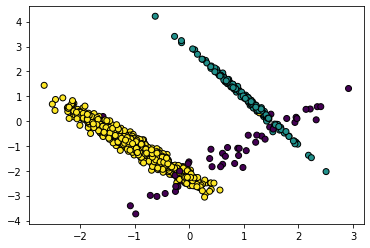

In [31]:
plt.scatter(data[:,0],data[:,1],c=label,linewidth=1, edgecolor='black')

In [32]:
from imblearn.over_sampling import SMOTE
# SMOTE를 활성화한다.
smote = SMOTE(k_neighbors=5)
# 접근점을 5개를 설정한다.

In [33]:
smoted_data, smoted_label = smote.fit_resample(data,label)

In [34]:
data.shape

(1000, 2)

In [35]:
smoted_data.shape

(2382, 2)

In [36]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))
# label 을 기준으로 더미데이터를 얻어내서 그 합계를 구한다.
# 이를 통해 SMOTE 는 제일 큰 값을 기준으로 다른 두개의 데이터의 갯수를 맞춘다는것을 알수있다.

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


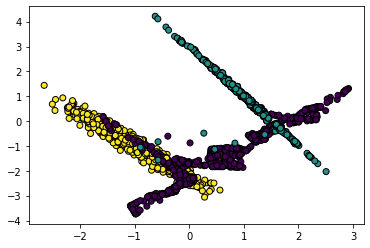

In [37]:
plt.scatter(smoted_data[:,0],smoted_data[:,1], c=smoted_label , linewidth=1,edgecolor='k')

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

In [39]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [40]:
digits.data.shape

(1797, 64)

In [41]:
data = digits.data
label = digits.target

Label : 0


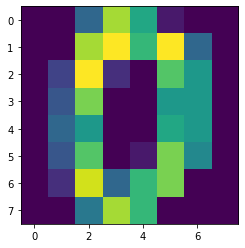

In [42]:
plt.imshow(data[0].reshape(8,8))
# reshape : 첫번째(0번째) 데이터의 모양을 재조정할수있다. (1차원을 2차원으로 변경)
#plt.imshow 로 이미지를 생성해서 보여준다.
print('Label : {}'.format(label[0]))

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 데이터의 주성분을 몇개로 줄일것인가.의 명령어이다. (2차원으로 만들겠다.)

In [44]:
new_data = pca.fit_transform(data)
# data를 pca로 새로 fit transform 을 진행하였다.

In [45]:
new_data

array([[ -1.25946603,  21.27488521],
       [  7.95761117, -20.76869935],
       [  6.9919225 ,  -9.95598773],
       ...,
       [ 10.80128375,  -6.96025122],
       [ -4.87210407,  12.42394589],
       [ -0.34438923,   6.36555027]])

In [46]:
data.shape

(1797, 64)

In [47]:
new_data.shape

(1797, 2)

In [48]:
new_data[0]

array([-1.25946603, 21.27488521])

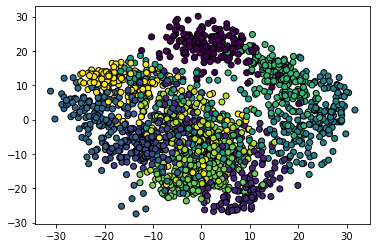

In [49]:
plt.scatter(new_data[:,0],new_data[:,1], c=label, linewidth=1 ,edgecolor='k')

In [50]:
data = pd.read_csv('data/abalone.txt',header=None,
                  names=abalone_columns )

In [51]:
label = data['Sex']

In [52]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 를 활성화한다.
le=LabelEncoder()
#라벨인코더를 앞으로 le 로 쓴다.

In [54]:
label_encoded_label = le.fit_transform(label)

In [55]:
label_encoded_label = le.fit_transform(label)
label_encoded_label.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [56]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1),
columns=['label', 'label_encoded'])
#concatenate : 이전데이터와 encoded 데이터를 함께 보여주는 명령어
# reshaped 를 통하여 그전과 후의 데이터의 형태를 바꿔주지 않으면 오류가 난다.

In [57]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [58]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(sparse=False)
# OneHot Encoder를 활성화한다.
# 옵션의 값은 기본값은 True 이다, 이때 Matrix 값이 나온다.
# sparse = False 로 설정하면 배열(array)이 나온다.
# sparse = True 로 설정하고 하면 원하는 형태가 아닌 Matrix 값으로 나온다.

In [59]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))
# 1차원 데이터이기때문에 2차원 데이터로 바꾸어 줘야한다.

In [60]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [61]:
from sklearn.datasets import load_wine
wine = load_wine()

In [62]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [63]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [64]:
data = pd.DataFrame(data,columns=columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [65]:
data.shape

(178, 13)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [68]:
data.shape

(178, 2)

In [69]:
from sklearn.cluster import KMeans
# K가 몇개 인가 의 의미이다.
kmeans = KMeans(n_clusters=3)
#군집의 갯수를 지정해준다. ( 정확한 갯수는 모르지만 최대한 그에 맞춘다.)

In [70]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [71]:
cluster = kmeans.predict(data)
#predict 예측한다.

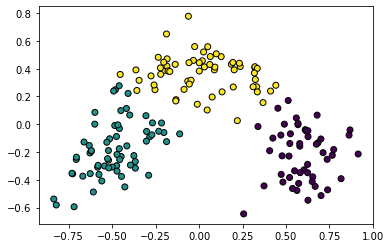

In [72]:
plt.scatter(data[:,0],data[:,1],c=cluster,
           linewidth=1, edgecolor='k')

 #  4월 12일 시작

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
!pip install mglearn
#안드레아스 뮐러 가 자주 사용한 라이브러리

In [75]:
import mglearn
# 데이터를 만들어주고 그리는 역할.

(26, 2)


C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


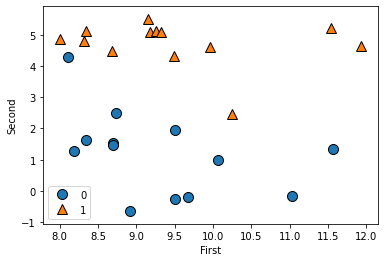

In [76]:
# 지도 학습 알고리즘

X,y =mglearn.datasets.make_forge()
# X는 대문자 feature, y는 소문자 target,label
#mglearn.datasets.make_forge() : 새로운 데이터를 생성한다. forge: 2그룹으로 데이터를 생성한다.
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# mglearn.discrete_scatter : 삼각형 점을 그릴수있는 Method , 실제로 사용하진않고 설명할때 사용한다.

plt.xlabel('First')
plt.ylabel('Second')
plt.legend()

print(X.shape)

(40, 1)


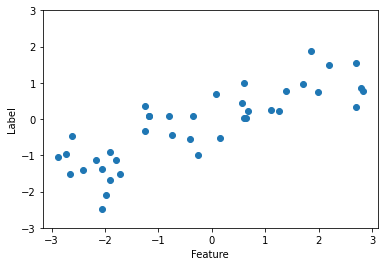

In [77]:
X,y =mglearn.datasets.make_wave(n_samples=40)
#_wave(n_sample=40) : 위와 다르게 40개의 샘플을 지정하여 만든다.
plt.plot(X,y,'o')
plt.ylim(-3,3)

plt.xlabel('Feature')
plt.ylabel('Label')

print(X.shape)

In [78]:
from sklearn.datasets import load_breast_cancer
# 유방암 데이터를 불러온다.
cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [79]:
cancer.data.shape

(569, 30)

In [80]:
cancer.target #malignant : 양성 , # benign : 음성


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [81]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [82]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


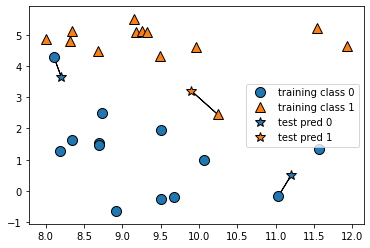

In [83]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 최근접 알고리즘이 어떻게 작동하는지 보여주는 그림

C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


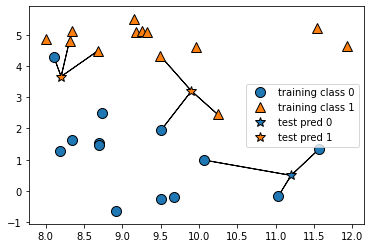

In [84]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 과반수로 하기때문에 보통 홀수로 한다.

In [85]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test ,y_train , y_test= train_test_split(X,y,random_state=0)

C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
# classifier 분류 , regression: 예측
clf = KNeighborsClassifier(n_neighbors=5)

In [87]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [89]:
clf.score(X_test, y_test)
# scroe : 정확도 accuray 를 확인하는 명령어.

0.8571428571428571

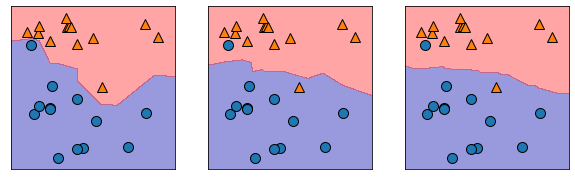

In [90]:
fig, axes= plt.subplots(1,3,figsize=(10,3))
# axes : 축  axis : 중심축

for n_neighbors, ax in zip([1,3,9],axes):
    clf= KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5, ax=ax,
                                   alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y,ax=ax)
#mglearn.plots.plot_2d_separator : 2차원으로 쪼개주는 method
#zip: 두가지를 결합해주는 method
# eps=

In [91]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test =train_test_split(
    cancer.data,cancer.target,random_state=66
)

training_accuracy=[]
test_accuracy =[]

neighbors_settings = range(1,11)
#range : 1부터 11까지의 리스트를 만든다.

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train)) #학습정확도,훈련정확도
    test_accuracy.append(clf.score(X_test,y_test))   #테스트정확도,
    
    #학습정확도 보다 테스트정확도가 더 중요하다.

In [92]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'accuracy')

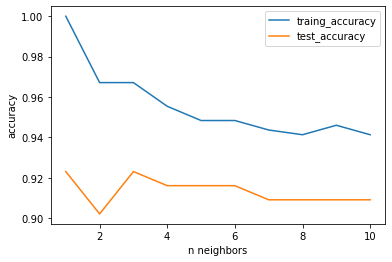

In [93]:
plt.plot(neighbors_settings, training_accuracy,label='traing_accuracy')
plt.plot(neighbors_settings, test_accuracy,label='test_accuracy')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
# 아래이 그림을 봤을때 3개일때가 가장 적잡하다.

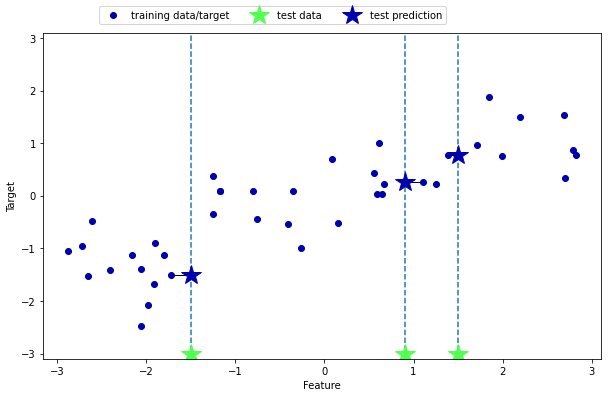

In [94]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# 기준점이 1개일때

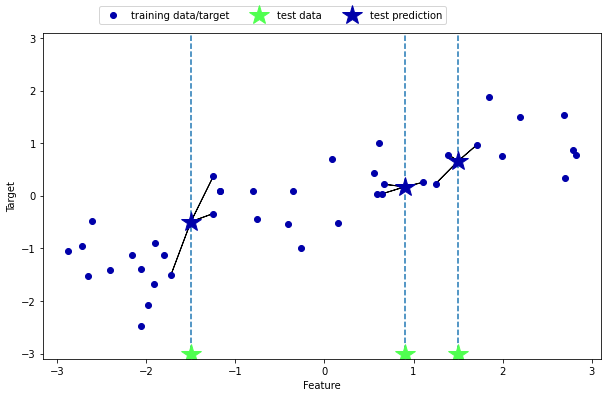

In [95]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 기준점이 3개일때
#데이터의 특성이 완화된다.

In [96]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [97]:
reg.predict(X_test)
reg.score(X_test,y_test)

0.8344172446249605

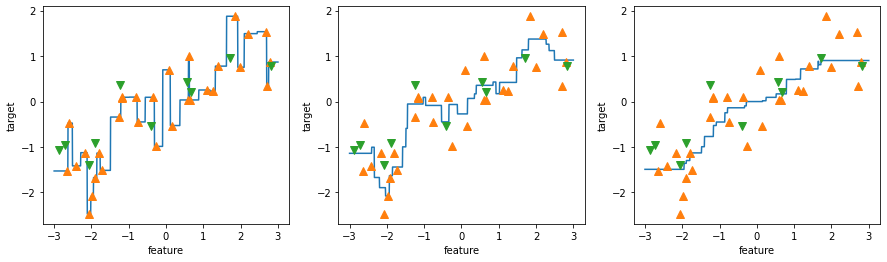

In [98]:
fig, axes= plt.subplots(1,3,figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
                               
for n_neighbors, ax in zip([1,3,9],axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, '^',markersize=8)
    ax.plot(X_test, y_test, 'v',markersize=8)
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    

w[0]: 0.393906  b: -0.031804


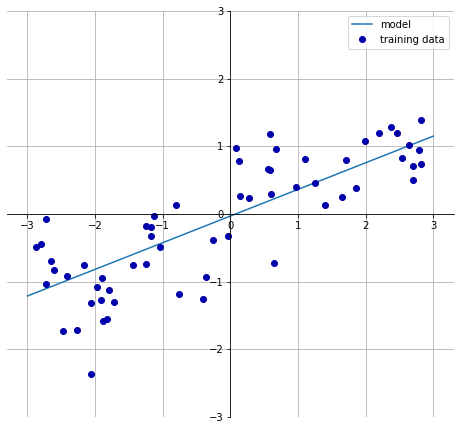

In [99]:
mglearn.plots.plot_linear_regression_wave()
#선형회귀 linear regression
#데이터의 값들의 평균값으로 선이 그려진다.

In [100]:
from sklearn.linear_model import LinearRegression
#선형모델 linear model
X , y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [101]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.65933685968637


In [102]:
print(lr.coef_)
print(lr.intercept_)
# 내부적으로 정의된 요소들은 끝에 언더바 _ 를 붙여줘야한다.
# coef_ : 기울기
# intercept- : y절편

[0.39390555]
-0.031804343026759746


In [103]:
X,y = mglearn.datasets.load_extended_boston()
#보스턴 집값 데이터

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr= LinearRegression().fit(X_train,y_train)

C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [104]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
# 선형회귀는 테스트 정확도가 많이 떨어지는것을 알수있다.

0.9520519609032728
0.6074721959665869


In [105]:
# Ridge / 릿지
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)

print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))
#알고리즘을 바꾸었더니 테스트 정확도가 올라갔다.
# 하지만 학습 정확도는 내려갔다.

0.8857966585170941
0.7527683481744756


In [106]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
# alpha : 제약,가중치

print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

#제약을 많이 주니 정확도가 줄어들었다.

0.7882787115369616
0.6359411489177312


In [107]:
ridge01= Ridge(alpha=0.1).fit(X_train,y_train)

print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.9282273685001984
0.7722067936480149


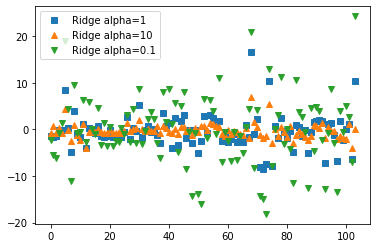

In [108]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.legend()

In [109]:
# Lasso / 라쏘 회귀

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))


0.29323768991114596
0.20937503255272272


In [110]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)

print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))

#제약을 줄였더니 몇배나 좋아진게 보인다.

0.8962226511086498
0.7656571174549986


In [111]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train,y_train)

print(lasso00001.score(X_train,y_train))
print(lasso00001.score(X_test,y_test))

# 제약을 더했더니 학습데이터는 더 정확해졌지만, 테스트데이터는 오히려 정확도가 떨어졌다.

0.9507158754515462
0.6437467421273158


In [112]:
lasso0 = Lasso(alpha=0 , max_iter=50000).fit(X_train,y_train)
# alpha 값이 0인상태에서는 max_iter 를 설정해도 의미가없다.
print(lasso0.score(X_train,y_train))
print(lasso0.score(X_test,y_test))

#제약을 걸지않으면 선형회귀와 차이가 없다.

C:\Users\Jemin\AppData\Local\Temp/ipykernel_12276/2570452901.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0 = Lasso(alpha=0 , max_iter=50000).fit(X_train,y_train)
C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.9518208621935011
0.6158830474835506


C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [113]:
lasso01 = Lasso(alpha=0.1 , max_iter=50000).fit(X_train,y_train)
# alpha 값이 0인상태에서는 max_iter 를 설정해도 의미가없다.
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))

0.7709955157630054
0.6302009976110041


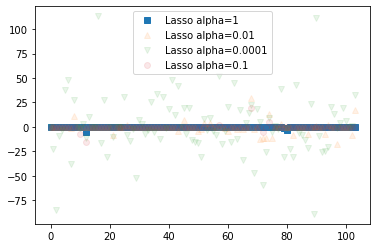

In [114]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1',alpha=1)

plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01',alpha=0.1)

plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001',alpha=0.1)

plt.plot(lasso01.coef_, 'o', label='Lasso alpha=0.1',alpha=0.1)

plt.legend()

C:\Users\Jemin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


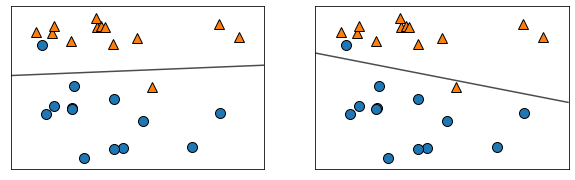

In [115]:
#분류에 대한 선형 모델
from sklearn.linear_model import LogisticRegression
# logistice Regression 은 회귀가 아닌 분류이다.
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
  
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,alpha=0.7,ax=ax)
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)

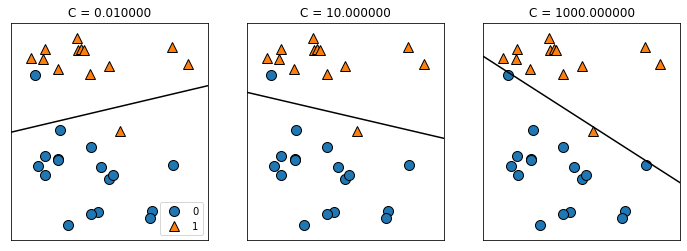

In [116]:
mglearn.plots.plot_linear_svc_regularization()
# regularization : 정규화 

# 4.13 수업 시작

In [117]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)

logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)
  #max_iter= 횟수를 지정한다, 지정하지않으면 기본값은 100이다.
  #매우 높은 횟수를 실행해도, 임계치(기울기가 0인지점)가 발견되면 그곳에서 반복을 멈춘다.
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.960093896713615
0.965034965034965


In [118]:
logreg100 = LogisticRegression(max_iter=5000, C=100).fit(X_train,y_train)
# C 의 디폴트 값은 1이다. C값이 클수록 알고리즘 내에서 오류를 허용하지 않는다.
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9812206572769953
0.965034965034965


In [119]:
logreg001 = LogisticRegression(max_iter=5000, C=0.01).fit(X_train,y_train)
# 오류를 허용할수록 정확도가 올라간다.
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9460093896713615
0.972027972027972


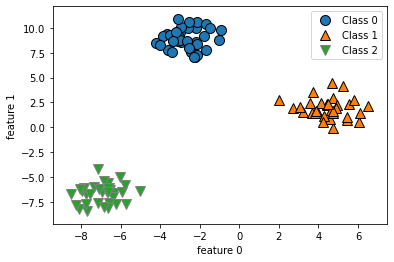

In [120]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

In [121]:
linear_svm = LinearSVC().fit(X,y)

In [122]:
print(linear_svm.coef_)
# 3가지 군집을 분류하기 위해서는 3개의 선이 필요해서 3개의 정보가 나온다.
print(linear_svm.intercept_)

[[-0.17492675  0.23141412]
 [ 0.4762192  -0.0693742 ]
 [-0.18914237 -0.20399599]]
[-1.07745529  0.13140779 -0.08604796]


In [123]:
print(linear_svm.coef_.shape)

(3, 2)


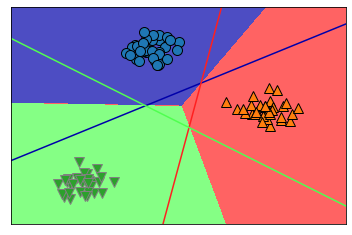

In [124]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_,
                               linear_svm.intercept_,
                               mglearn.cm3.colors):
    plt.plot(line, -(line* coef[0]+intercept) / coef[1],c=color)
    
#3개의 선을 긋는 코드

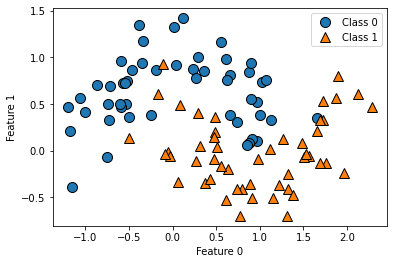

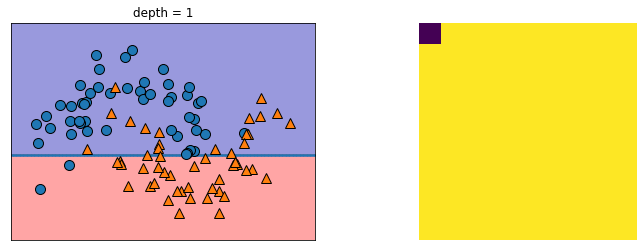

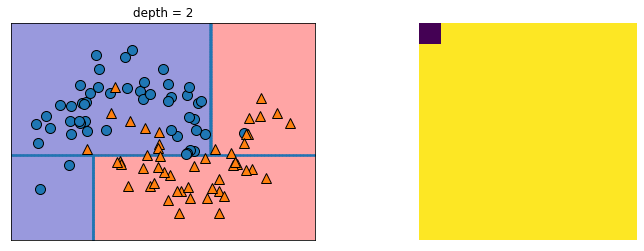

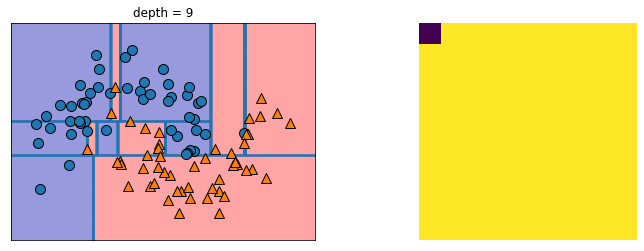

In [125]:
# Tree 계열 분류 알고리즘
mglearn.plots.plot_tree_progressive()

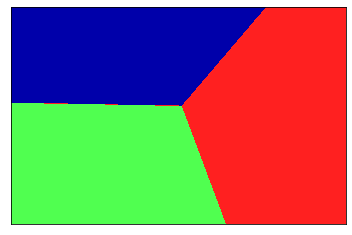

In [126]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True)

## 오후시작

In [127]:
from sklearn.tree import DecisionTreeClassifier
#트리 알고리즘의 의사결정나무
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [128]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.9300699300699301


In [130]:
tree =DecisionTreeClassifier(max_depth=4, random_state=0)
#max_depth = 데이터가 과적합 하는것을 막기위해서 깊이를 제한한다.

tree.fit(X_train, y_train)

print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

#학습데이터의 정확도는 낮아졌지만, 테스트데이터에 대한 정확도는 올라갔다.

0.9953051643192489
0.951048951048951


[Text(0.5657894736842105, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]\nclass = B'),
 Text(0.34210526315789475, 0.7, 'worst radius <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]\nclass = B'),
 Text(0.21052631578947367, 0.5, 'radius error <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]\nclass = B'),
 Text(0.10526315789473684, 0.3, 'worst smoothness <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = B'),
 Text(0.05263157894736842, 0.1, 'gini = 0.016\nsamples = 245\nvalue = [2, 243]\nclass = B'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = A'),
 Text(0.3157894736842105, 0.3, 'symmetry error <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = A'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = A'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.47368421052631576, 0.5, 'worst texture <= 19.91\ng

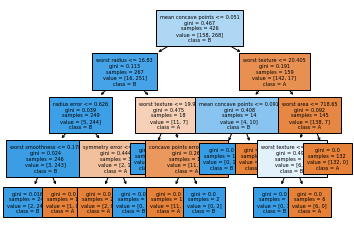

In [131]:
from sklearn.tree import plot_tree
#트리를 그리는 명령어

plot_tree(tree,class_names=['A','B'], filled=True, fontsize=5, feature_names=cancer.feature_names)

In [132]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


Text(0, 0.5, 'Price')

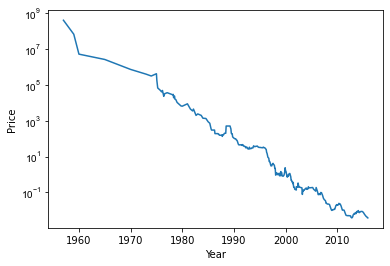

In [133]:
import os
ram_price=pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_price.date, ram_price.price)
plt.yticks(fontname = 'Arial')
plt.xlabel('Year')
plt.ylabel('Price')
# ticks : 단위를 의미

In [134]:
from sklearn.tree import DecisionTreeClassifier

data_train =ram_price[ram_price.date < 2000] #2000년 보다 작은것
data_test = ram_price[ram_price.date >= 2000] #2000년 보다 큰것

In [135]:
X_train = data_train.date.to_numpy()[:,np.newaxis]
# to_numpy : series 였던 배열을 numpy 배열로 바꾼다.
#[] :슬라이싱 , np.newaxis : numpy 배열에서 새로운 축을 만든다.

In [136]:
y_train = np.log(data_train.price)
#np.log : 로그함수로 감싼다, 

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor : 

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

In [138]:
X_all = ram_price.date.to_numpy()[:,np.newaxis]
# X의 전체 날짜를 만들었다.

In [139]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [140]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
#log 값으로 바꾸었던것을 다시 원래값으로 바꾼다.

In [141]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

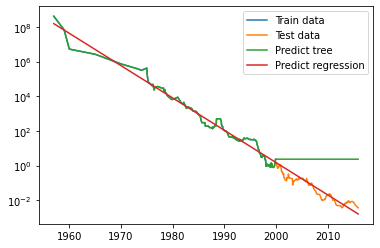

In [142]:
plt.semilogy(data_train.date,data_train.price, label ='Train data')
plt.semilogy(data_test.date, data_test.price,label='Test data')
plt.semilogy(ram_price.date, price_tree, label = 'Predict tree')
plt.semilogy(ram_price.date, price_lr,label = 'Predict regression')
plt.legend()

In [144]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_moons

X, y =make_moons(n_samples=100, noise=0.25, random_state=3)
# noise: 만든 데이터가 너무 깔끔하면 테스트할때 좋지않으므로 noise를 줌으로써 오차를 만든다.

In [145]:
X_train , X_test, y_train , y_test = train_test_split(X,y, random_state=42)

In [151]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
# n_estimators : 기본값은 100개 이다, n개의 나무를 가지고 문제를 풀어본다.
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

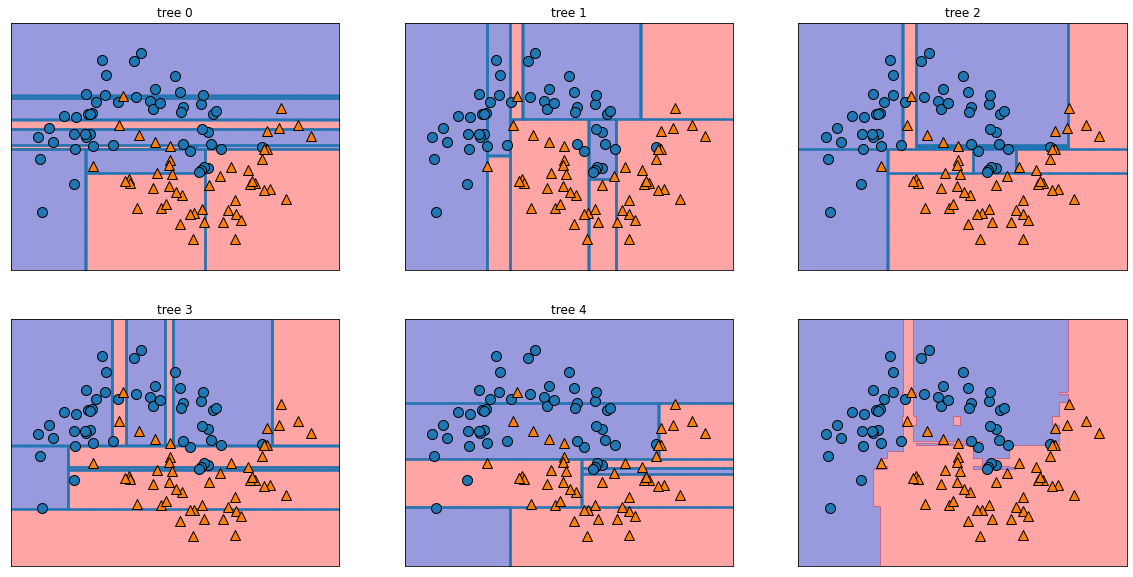

In [157]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
    #enumerate : 열거형 으로 만들어준다. 통째로 자료형으로 만들어준다.
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1],
                               alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

# [-1,-1] 의 뜻: 0,0점의 기준에서 반대쪽끝을 의미한다.

In [159]:
X_train , X_test , y_train, y_test = train_test_split(
cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [162]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

1.0
0.972027972027972


In [172]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Classifier importance")
    plt.ylabel("Classifier")
    plt.ylim(-1, n_features)

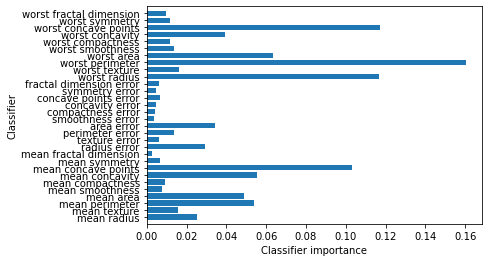

In [173]:
plot_feature_importances_cancer(forest)

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
# 그래디언트 부스팅을 한다.
X_train , X_test , y_train, y_test = train_test_split(cancer.data,
                                                     cancer.target,
                                                     random_state=0)

In [168]:
gbrt= GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [169]:
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

1.0
0.965034965034965


In [175]:
gbrt= GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))
#depth 를 얕게 제약을 걸어도 정확도가 높다.

0.9906103286384976
0.972027972027972


In [177]:
gbrt= GradientBoostingClassifier(random_state=0, learning_rate=0.01)
# learning_rate = 복잡도
gbrt.fit(X_train,y_train)

print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9882629107981221
0.965034965034965


In [178]:
gbrt= GradientBoostingClassifier(random_state=0, learning_rate=1)

gbrt.fit(X_train,y_train)

print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

1.0
0.9790209790209791


Text(0, 0.5, 'feature 1')

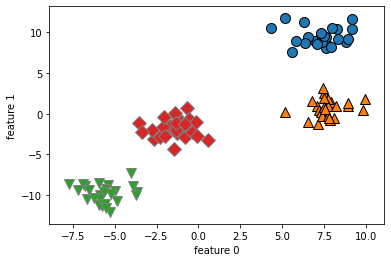

In [187]:
X,y=make_blobs(centers=4,random_state=8)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

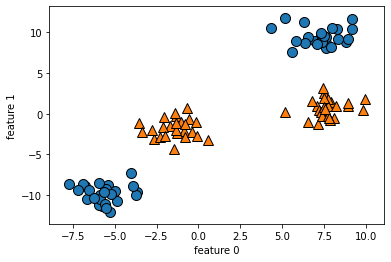

In [188]:
X,y=make_blobs(centers=4,random_state=8)
y=y%2
# % : 나누기를 하고 나머지를 확인한다.

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')